# Flip review analisis


*   By Ruhan Masykuri
*   ruhanmasykuri@gmail.com



## Preparation

### Prepare needed library



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

### Prepare The Data

In [2]:
data = pd.read_csv('/content/flip_review.csv')

## Data Understanding

In [3]:
data.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,1570
at,0
replyContent,7102
repliedAt,7102


In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
9995,53a50886-4eb3-4c8c-8ca3-b58b85b49097,Sign Carlen,https://play-lh.googleusercontent.com/a-/ALV-U...,"Saya kasih 4 dulu, thx sudah amanah",4,0,3.15.0,2024-07-05 12:40:43,NaN,NaN,3.15.0
9996,7c7581c3-1f4a-4b6e-b8aa-d0bac49abd14,Ashifa Mutia,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi andalan, cara pakenya gampang banget,...",5,48,3.15.0,2024-07-05 12:38:33,NaN,NaN,3.15.0
9997,a4f26e71-44f6-45aa-b533-8206e2b2ed49,Adinda Chiila,https://play-lh.googleusercontent.com/a-/ALV-U...,lama njir loadingnya,1,0,3.14.0,2024-07-05 12:36:43,"Halo, Kak 1-Adinda Chiila-id\n\nMohon maaf ata...",2024-07-14 08:12:11,3.14.0
9998,fc31469a-a14f-436c-b6fb-6b53f7f53488,Hasmizar Chaniago,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat membantu dlm bertransaksi Kembangankan ...,5,0,3.15.0,2024-07-05 12:31:17,NaN,NaN,3.15.0
9999,c0e956c3-0c8a-417c-8604-4ecc346e1962,nahar sejati,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat terbantu,5,0,3.12.0,2024-07-05 12:31:10,NaN,NaN,3.12.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8430 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          2898 non-null   object
 9   repliedAt             2898 non-null   object
 10  appVersion            8430 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [7]:
(data['reviewCreatedVersion'] == data['appVersion']).value_counts()

,count
True,8430
False,1570


In [8]:
data['reviewId'].value_counts()

,count
reviewId,
5c1671c1-e659-4b7b-a480-2e5aef7b06c1,1
a53a9fba-b8f4-4a17-9d42-10cbbe6dcfe8,1
eebeeb72-5b81-436c-91c7-f5f73c8f9d63,1
590eaf21-4bdd-40fa-afc2-8ab0882b0ac1,1
a1941202-45ef-4fab-b3ba-2e22629ce713,1
...,...
961bba12-4e14-4b49-b832-6417589c0aa8,1
cd8fada2-1466-4fe1-b98f-400fa32b92ac,1
8aa97447-61a7-4704-b5c0-f38f6455c474,1


In [9]:
pd.DataFrame(data['replyContent'].value_counts())

,count
replyContent,
"Halo, Kak. Mohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala yang Kakak alami melalui chat bantuan di aplikasi Flip, dengan subjek: Keluhan Google Play Store {nama di Google Play Store} agar dapat segera kami cek ya.",36
"Halo, Kak\n\nMohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala yang Kakak alami melalui email hello@flip.id, dengan subjek: Keluhan Google Play Store {nama di Google Play Store} agar dapat segera kami cek ya.",19
"Baik, Kak terima kasih atas sarannya. Akan disampaikan ke tim terkait ya, Kak.",15
"Halo, Kak. Mohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala yang Kakak alami melalui chat bantuan di aplikasi Flip ya. Tim kami siap membantu.",12
"Halo, Kak\n\nMohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala transfer antarbank yang Kakak alami melalui email hello@flip.id, dengan subjek: Keluhan Google Play Store {nama di Google Play Store} agar dapat segera kami cek ya.",10
...,...
"Halo, Kak Andy Putra (Junan)\n\nMohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala yang Kakak alami melalui email hello@flip.id, dengan subjek: Keluhan Google Play Store {nama di Google Play Store} agar dapat segera kami cek ya.",1
"Halo, Kak Super Red\n\nMohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala transfer yang Kakak alami melalui email hello@flip.id, dengan subjek: Keluhan Google Play Store {nama di Google Play Store} agar dapat segera kami cek ya.",1
"Halo, Kak Indra Lesmana\n\nMohon maaf atas ketidaknyamanannya. Mohon dapat menginformasikan kendala transfer yang Kakak alami melalui email hello@flip.id, dengan subjek: Keluhan Google Play Store {nama di Google Play Store} agar dapat segera kami cek ya.",1


Data understanding insight :
- dtype at and repliedAt need to convert to datetime
- reviewCreatedVersion dan appVersion identik
- reviewId, userName, reviewCreatedVersion, and userImage can be dropped
- No duplicated data
- Missing values on reviewCreatedVersion, replyContent, repliedAt, and appVersion




## Data Preparation / Preprocessing

In [10]:
data['at'] = pd.to_datetime(data['at'])
data['repliedAt'] = pd.to_datetime(data['repliedAt'])

In [11]:
data[['reviewCreatedVersion', 'replyContent', 'appVersion']] = data[['reviewCreatedVersion', 'replyContent', 'appVersion']].fillna('unknown')

In [12]:
data.drop(['reviewId', 'userName', 'userImage', 'reviewCreatedVersion'], axis=1, inplace=True)

In [13]:
data['at'].dt.year.value_counts().sort_index()

,count
at,
2024,5477
2025,4523


In [14]:
data.head()

,content,score,thumbsUpCount,at,replyContent,repliedAt,appVersion
0,"sekarang semakin jelek aja ini aplikasi, csnya...",1,0,2025-07-10 15:59:20,"Halo, Kak. Mohon maaf atas ketidaknyamanannya....",2025-07-10 16:59:32,2.0.0
1,semoga flip semakin jaya,5,0,2025-07-10 15:45:15,unknown,NaT,3.37.0
2,mau transfer top up belanja online+Cashback dl...,5,0,2025-07-10 15:11:08,unknown,NaT,3.37.1
3,aplikasi flip lebih mempermudah kita untuk ber...,5,0,2025-07-10 14:54:45,unknown,NaT,3.37.1
4,"edit dulu baru,aja bisa krna masuk pake akun l...",4,0,2025-07-10 14:24:42,"Halo, Kak. Mohon maaf atas ketidaknyamanannya....",2025-07-10 10:46:48,3.37.1


In [15]:
cat = ['score', 'thumbsUpCount', 'appVersion']

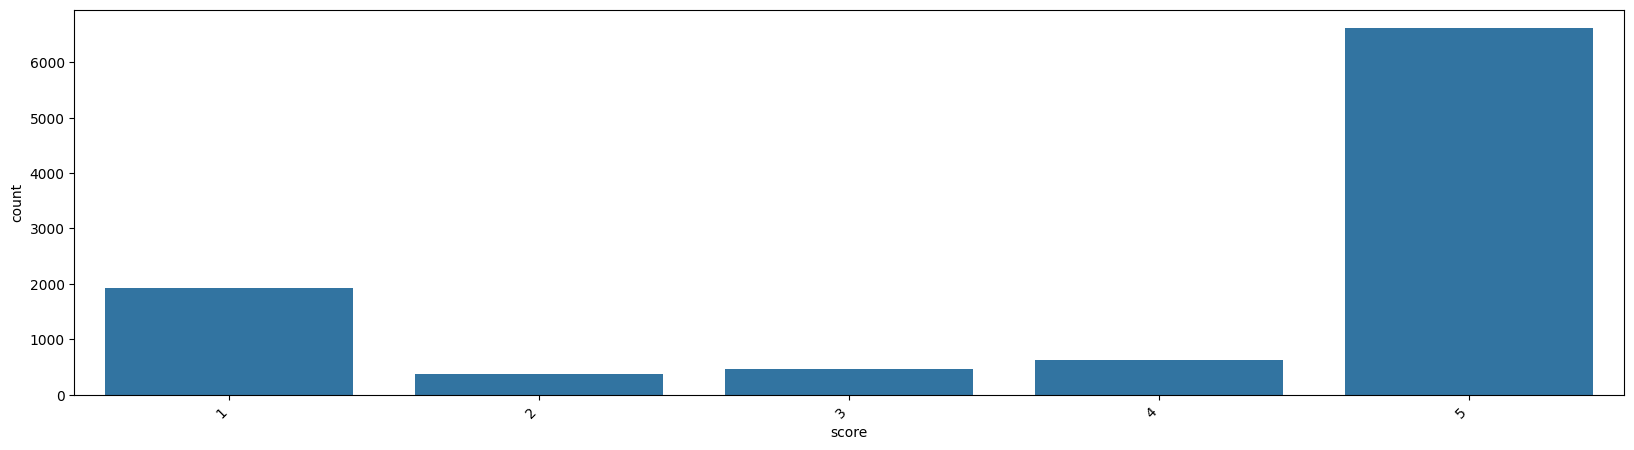

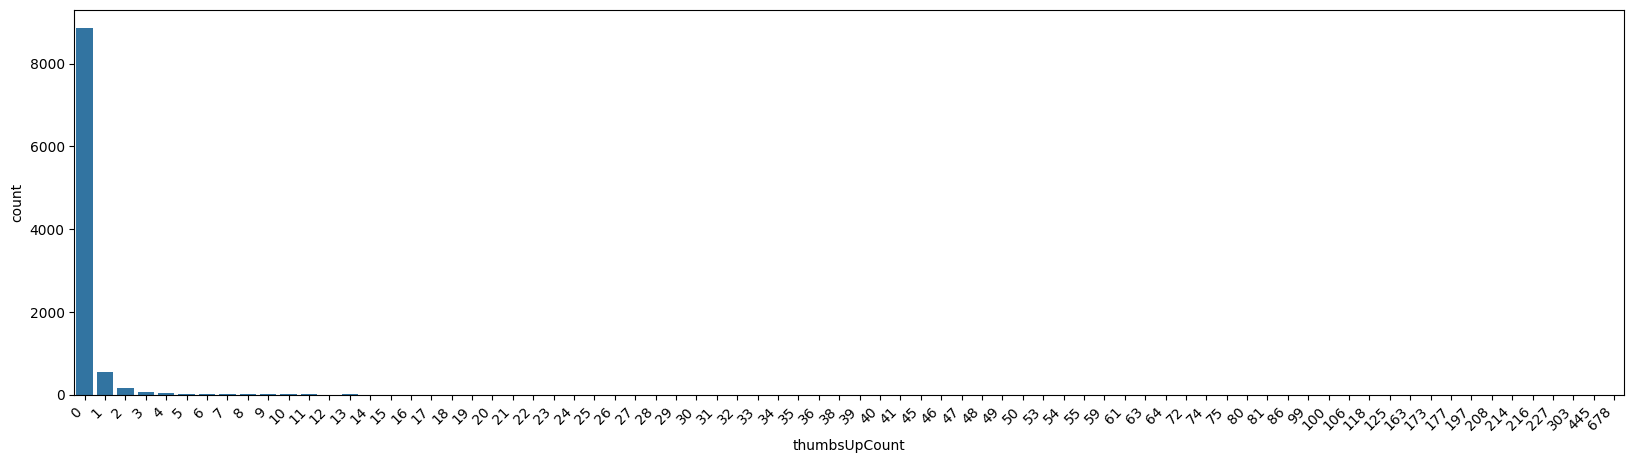

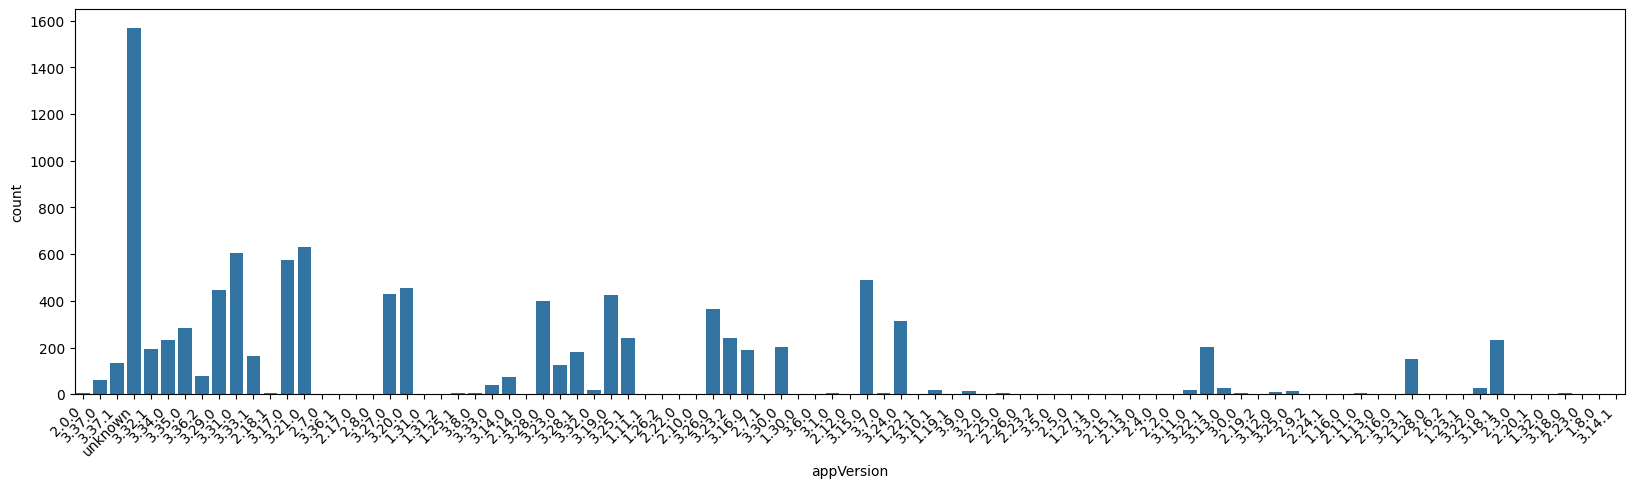

In [16]:
for col in cat:
  plt.figure(figsize=(20,5))
  sns.countplot(data=data, x=col)
  plt.xticks(rotation=45, ha='right')
  plt.show()

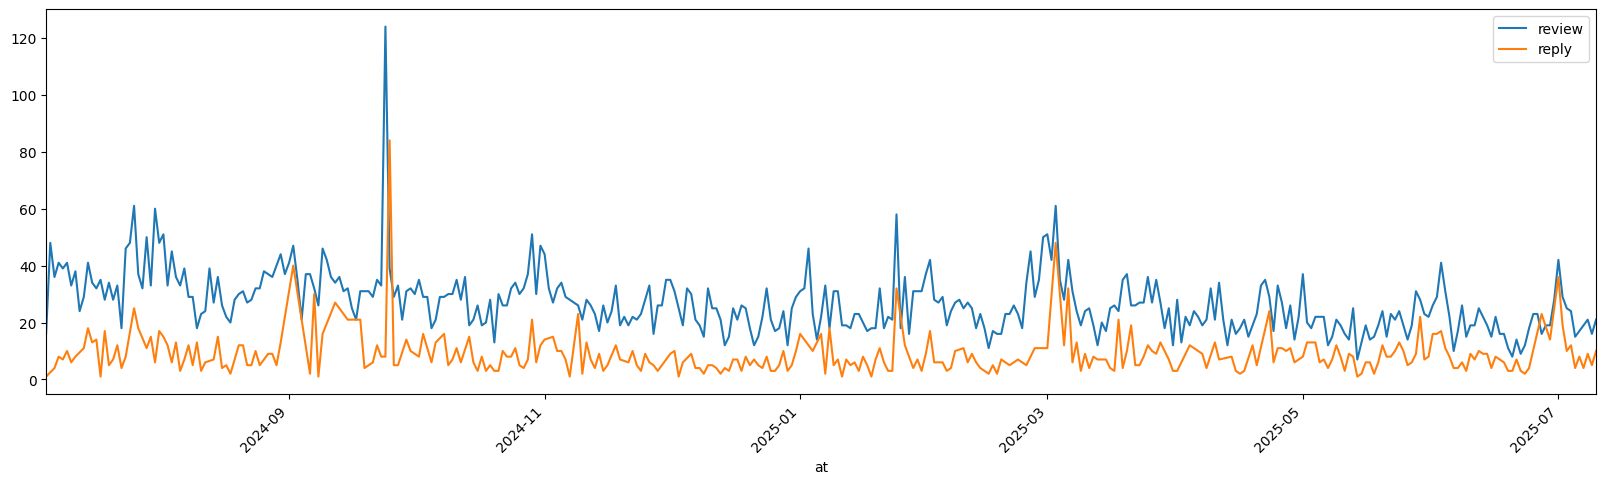

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(x=data.groupby(data['at'].dt.date).size().index,
             y=data.groupby(data['at'].dt.date).size().values,
             label='review')
plt.xticks(rotation=45, ha='right')
sns.lineplot(x=data.groupby(data['repliedAt'].dt.date).size().index,
             y=data.groupby(data['repliedAt'].dt.date).size().values,
             label='reply')
plt.xlim(left=data.groupby(data['at'].dt.date).size().index.min(),
         right=data.groupby(data['at'].dt.date).size().index.max())
plt.legend()
plt.show()

In [18]:
#data.to_csv('flip_review_clean.csv', index=False)

### word content

In [19]:
!pip install Sastrawi

In [20]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt')

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [22]:
data['sentiment'] = data['score'].apply(lambda x: 1 if x>3 else 0)

In [23]:
clean_df = data.copy()

In [24]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [26]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [27]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    7250
negative    2750
Name: count, dtype: int64


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']


In [29]:

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


In [30]:
unbalance = pd.concat([features_df, y], axis=1)

In [31]:
print(y.value_counts())

polarity
positive    7250
negative    2750
Name: count, dtype: int64


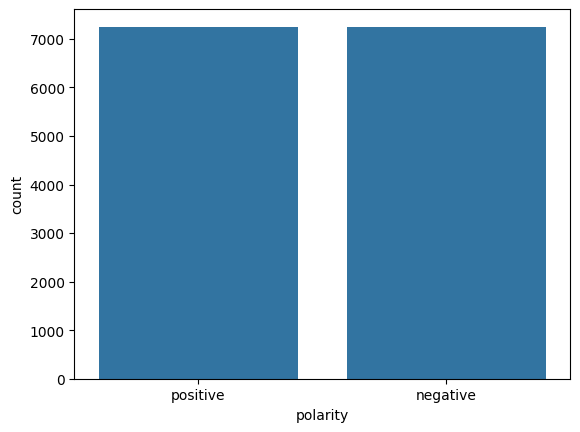

In [32]:
from sklearn.utils import resample, shuffle
minority = unbalance[unbalance.polarity == 'negative']
majority = unbalance[unbalance.polarity == 'positive']
#undersampled_majority = resample(majority, n_samples=minority.shape[0], random_state=42)
uppersampled_minority = resample(minority, n_samples=majority.shape[0], random_state=42)
balanced_data = pd.concat([majority, uppersampled_minority])
balanced_data = shuffle(balanced_data)

sns.countplot(data=balanced_data, x='polarity')
plt.show()

In [33]:
new_x = balanced_data.iloc[:, :-1]
new_y = balanced_data.iloc[:, -1]

In [34]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

## Modeling

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)


Decision Tree - accuracy_train: 0.9710344827586207
Decision Tree - accuracy_test: 0.9044827586206896


## Evaluation

In [36]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

search = HalvingGridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    scoring='accuracy',
    cv=5,
    factor=2,
    random_state=42
)
search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=DecisionTreeClassifier(), factor=2,
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': [3, 5, 10, None],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5, 10]},
                    random_state=42, scoring='accuracy')

In [37]:
print('Best Parameter: ',search.best_params_)
print('Best Score:', search.best_score_)

Best Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9022452504317791


In [40]:
best_dt1 = search.best_estimator_

y_pred_test = best_dt1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    negative       0.89      0.93      0.91      1460
    positive       0.92      0.89      0.90      1440

    accuracy                           0.91      2900
   macro avg       0.91      0.91      0.91      2900
weighted avg       0.91      0.91      0.91      2900



In [42]:
pip freeze > requirements.txt